# Import Necessary Libraries

In [22]:
import tensorflow
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 50s 4us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

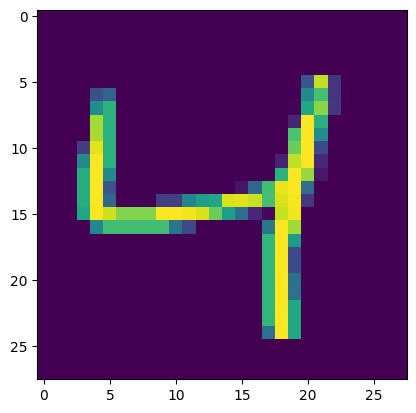

In [9]:
plt.imshow(X_train[2])

In [10]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model = Sequential()

In [15]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25


1500/1500 [==============================] - 8s 5ms/step - loss: 0.2965 - accuracy: 0.9139 - val_loss: 0.1692 - val_accuracy: 0.9489
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1243 - accuracy: 0.9627 - val_loss: 0.1171 - val_accuracy: 0.9656
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0847 - accuracy: 0.9740 - val_loss: 0.1128 - val_accuracy: 0.9674
Epoch 4/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0632 - accuracy: 0.9803 - val_loss: 0.0925 - val_accuracy: 0.9723
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0865 - val_accuracy: 0.9738
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.1044 - val_accuracy: 0.9725
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.1097 - val_accurac

In [19]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
y_pred = y_prob.argmax(axis=1)

In [23]:
accuracy_score(y_test,y_pred)

0.9749

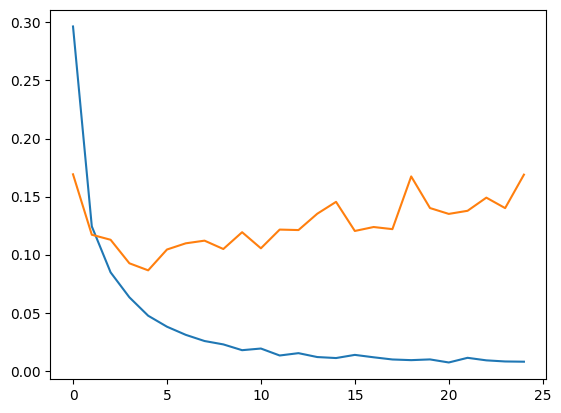

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

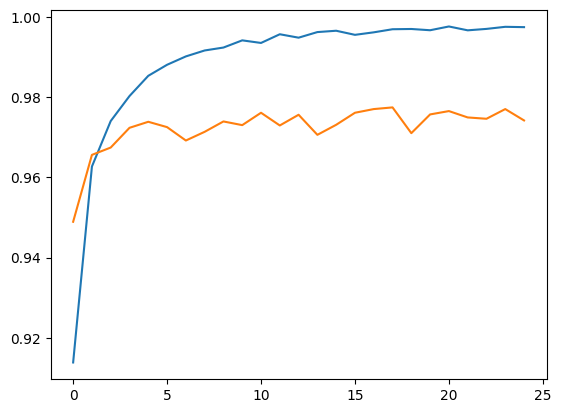

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

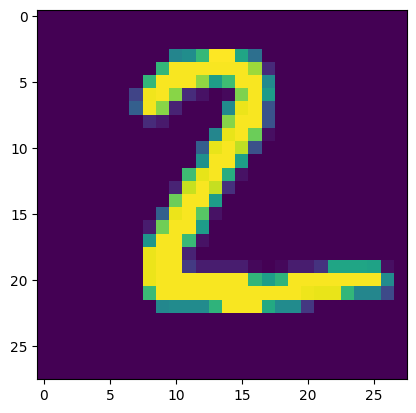

In [30]:
plt.imshow(X_test[1])

In [31]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 35ms/step


array([2], dtype=int64)